In [2]:
## TASK_1:-Restaurant Ratings Analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('/content/drive/MyDrive/Project/Dataset .csv')

df.head()
df.shape
df.columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

In [3]:
## DATA CLEANING
df['Cuisines'] = df['Cuisines'].fillna('Unknown')
df = df.drop_duplicates()
df = df[df['Aggregate rating'] > 0]
df['Has Online delivery'] = df['Has Online delivery'].str.strip()
df.isnull().sum()
df.shape

(7403, 21)

In [4]:
df['Aggregate rating'].describe()


,Aggregate rating
count,7403.000000
mean,3.440024
std,0.552195
min,1.800000
25%,3.000000
50%,3.400000
75%,3.800000
max,4.900000


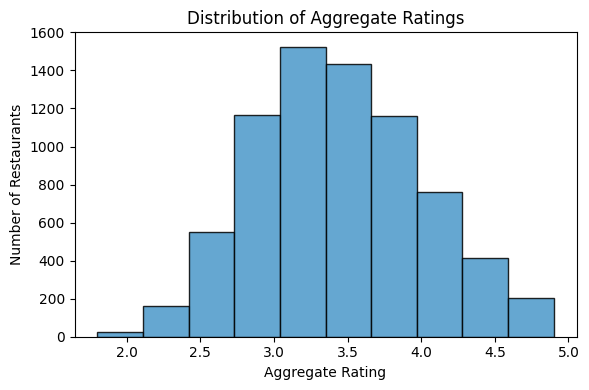

In [9]:
plt.figure(figsize=(6,4))

plt.hist(
    df['Aggregate rating'],
    bins=10,
    color=plt.cm.Blues(0.6),   # blue shade
    edgecolor='black',
    alpha=0.85
)

plt.title('Distribution of Aggregate Ratings')
plt.xlabel('Aggregate Rating')
plt.ylabel('Number of Restaurants')
plt.tight_layout()
plt.show()


In [7]:
rating_bins = pd.cut(
    df['Aggregate rating'],
    bins=[0,1,2,3,4,5]
)

rating_bins.value_counts().sort_index()

,count
Aggregate rating,
"(0, 1]",0
"(1, 2]",10
"(2, 3]",1891
"(3, 4]",4388
"(4, 5]",1114


In [8]:
avg_votes = df['Votes'].mean()
round(avg_votes, 2)


np.float64(202.19)

In [10]:
### Task 1: Restaurant Ratings – Insights
## - The histogram shows the distribution of restaurant ratings across the dataset.
## - Most restaurants fall within the mid to high rating ranges.
## - The average number of votes per restaurant indicates overall customer engagement.


In [13]:
## TASK 2:-Cuisines Combination Analysis
cuisine_series = (
    df['Cuisines']
    .str.split(', ')
    .explode()
)

top_cuisines = cuisine_series.value_counts().head(10)
top_cuisines



,count
Cuisines,
North Indian,3017
Chinese,2184
Fast Food,1563
Mughlai,794
Italian,726
Continental,699
Cafe,634
Desserts,543
Bakery,536


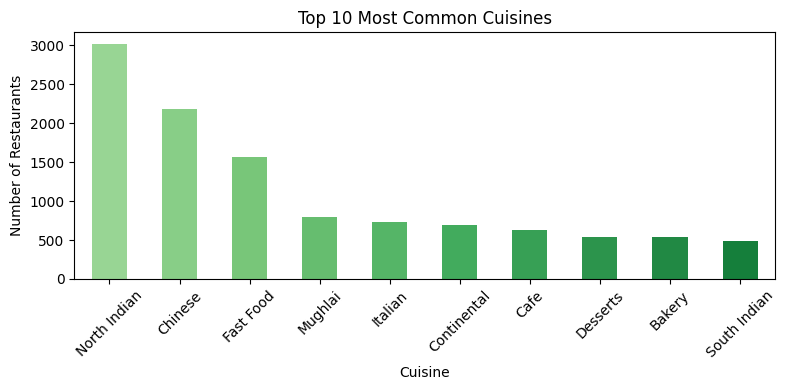

In [15]:
import numpy as np

colors = plt.cm.Greens(np.linspace(0.4, 0.8, len(top_cuisines)))

plt.figure(figsize=(8,4))
top_cuisines.plot(kind='bar', color=colors)

plt.title('Top 10 Most Common Cuisines')
plt.xlabel('Cuisine')
plt.ylabel('Number of Restaurants')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


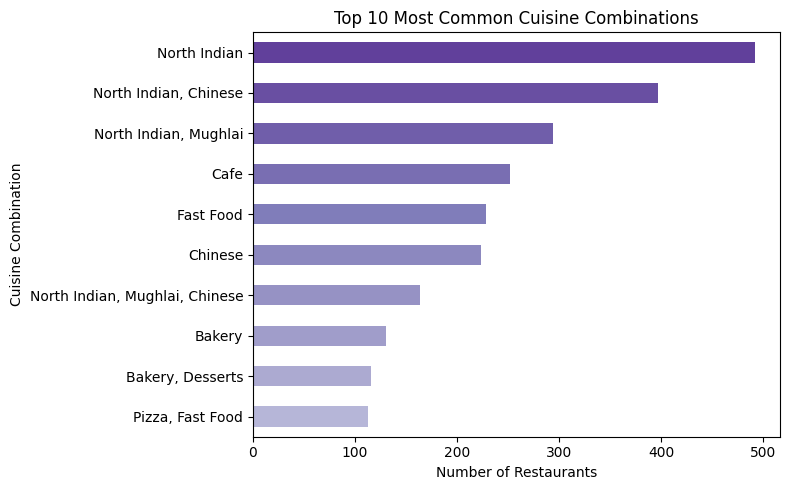

In [19]:
import numpy as np

top_combinations = df['Cuisines'].value_counts().head(10)

colors = plt.cm.Purples(np.linspace(0.4, 0.8, len(top_combinations)))

plt.figure(figsize=(8,5))
top_combinations.sort_values().plot(
    kind='barh',
    color=colors
)

plt.title('Top 10 Most Common Cuisine Combinations')
plt.xlabel('Number of Restaurants')
plt.ylabel('Cuisine Combination')
plt.tight_layout()
plt.show()


In [20]:
### Task 2: Cuisine Combination Analysis – Insights
## - Several restaurants offer multiple cuisines rather than a single cuisine type.
## - Certain cuisine combinations appear more frequently, indicating popular pairing preferences.
## - This analysis highlights customer demand for variety in dining options.


In [22]:
## TASK 3:-Geographic Analysis
df[['Latitude', 'Longitude']].describe()


,Latitude,Longitude
count,7403.000000,7403.000000
mean,26.182970,63.462859
std,11.267380,44.696549
min,-41.330428,-157.948486
25%,28.475505,77.082416
50%,28.570000,77.191784
75%,28.645259,77.272293
max,55.976980,174.832089


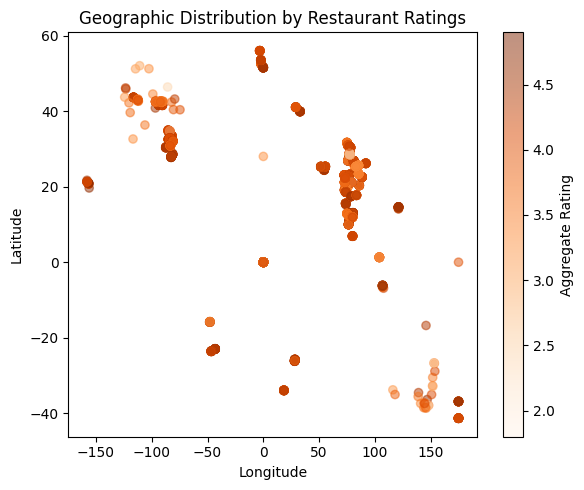

In [26]:
plt.figure(figsize=(6,5))

plt.scatter(
    df['Longitude'],
    df['Latitude'],
    c=df['Aggregate rating'],
    cmap='Oranges',
    alpha=0.5
)

plt.colorbar(label='Aggregate Rating')

plt.title('Geographic Distribution by Restaurant Ratings')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.tight_layout()
plt.show()


In [27]:
### Task 3: Geographic Analysis – Insights
## - Restaurants are concentrated in specific geographic regions, indicating higher urban density.
## - Rating-based coloring highlights variation in restaurant quality across locations.
## - The visualization helps identify clusters of highly rated restaurants.


In [30]:
## TASK_4:-Restaurant Chains Analysis
chain_counts = df['Restaurant Name'].value_counts()
chains = chain_counts[chain_counts > 1]
chains.head(10)


top_chains = chains.head(10)
top_chains

,count
Restaurant Name,
Domino's Pizza,74
Cafe Coffee Day,67
Subway,61
McDonald's,47
Green Chick Chop,44
Keventers,29
Pizza Hut,29
Barbeque Nation,26
Giani,24


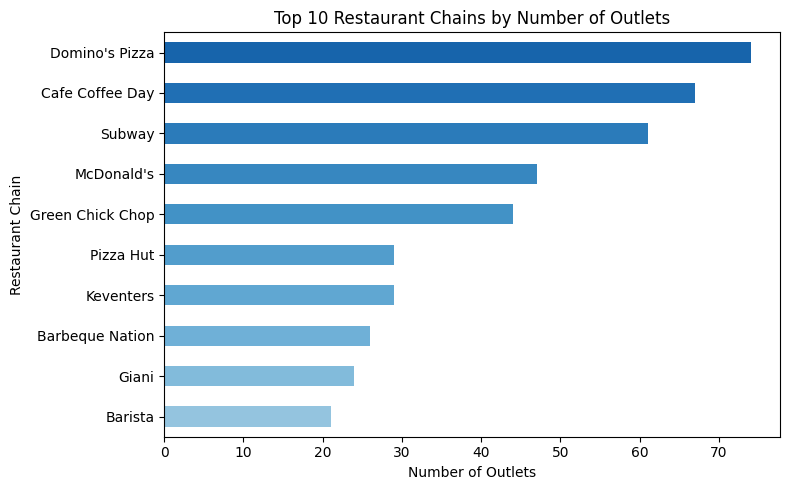

In [34]:
import numpy as np

colors = plt.cm.Blues(np.linspace(0.4, 0.8, len(top_chains)))

plt.figure(figsize=(8,5))
top_chains.sort_values().plot(
    kind='barh',
    color=colors
)

plt.title('Top 10 Restaurant Chains by Number of Outlets')
plt.xlabel('Number of Outlets')
plt.ylabel('Restaurant Chain')
plt.tight_layout()
plt.show()


In [36]:
chain_avg_rating = (
    df[df['Restaurant Name'].isin(top_chains.index)]
    .groupby('Restaurant Name')['Aggregate rating']
    .mean()
    .sort_values(ascending=False)
)

chain_avg_rating

,Aggregate rating
Restaurant Name,
Barbeque Nation,4.353846
Pizza Hut,3.434483
McDonald's,3.410638
Keventers,3.365517
Giani,3.250000
Barista,3.219048
Green Chick Chop,3.097727
Subway,3.003279
Cafe Coffee Day,2.997015


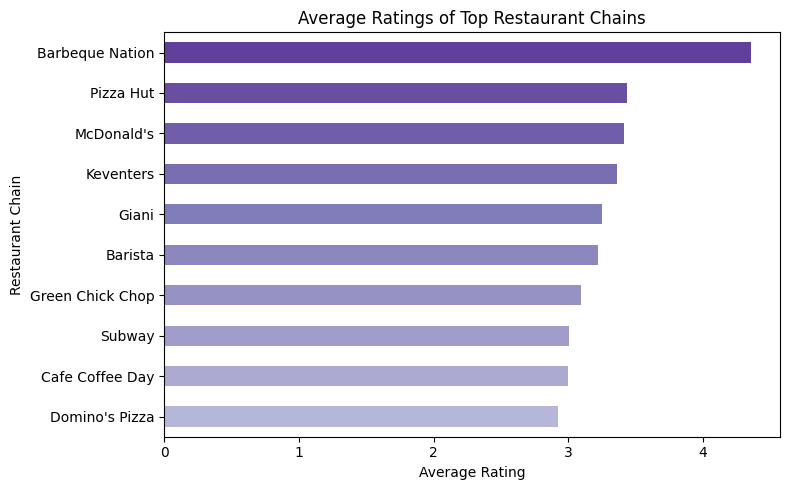

In [37]:
import numpy as np

colors = plt.cm.Purples(np.linspace(0.4, 0.8, len(chain_avg_rating)))

plt.figure(figsize=(8,5))
chain_avg_rating.sort_values().plot(
    kind='barh',
    color=colors
)

plt.title('Average Ratings of Top Restaurant Chains')
plt.xlabel('Average Rating')
plt.ylabel('Restaurant Chain')
plt.tight_layout()
plt.show()


In [ ]:
### Task 4: Restaurant Chains – Insights
## - Several restaurant chains operate multiple outlets, indicating strong brand presence.
## - Popularity in terms of outlet count does not always guarantee the highest average rating.
## - This analysis highlights differences between brand reach and customer satisfaction.
